In [1]:
import numpy as np
import pandas as pd 
import scanpy as sc
import utils
import mrf
import os 
import random 
import imp
import mrf

/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_3377/1071779760.py:8: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [10]:
imp.reload(mrf)

<module 'mrf' from '/home/qinxianhan/project/spatial/Hidden_Markov_Random_Field/src/mrf.py'>

In [3]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8,8))
import seaborn as sns

In [4]:
adata = sc.read_visium('../../dataset/goldStandard')
adata = utils.data_preprocess(adata)

/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
from sklearn import mixture 
gmm = mixture.GaussianMixture(n_components=2)

In [6]:
coord = np.array(adata.obs.iloc[:,1:3])
target_gene ='NEFH' 

In [11]:
beta =5
labels_list= mrf.mrf_process(adata, gene_id=target_gene, beta = beta,max_iteration=5e4)

77 121


  0%|          | 0/50000 [00:00<?, ?it/s]/home/qinxianhan/project/spatial/Hidden_Markov_Random_Field/src/mrf.py:52: RuntimeWarning: divide by zero encountered in log
  new_energy = np.log(np.sqrt(2 * np.pi * var_new)) + (
/home/qinxianhan/project/spatial/Hidden_Markov_Random_Field/src/mrf.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  new_energy = np.log(np.sqrt(2 * np.pi * var_new)) + (
/home/qinxianhan/project/spatial/Hidden_Markov_Random_Field/src/mrf.py:52: RuntimeWarning: invalid value encountered in scalar add
  new_energy = np.log(np.sqrt(2 * np.pi * var_new)) + (
/home/qinxianhan/project/spatial/Hidden_Markov_Random_Field/src/mrf.py:42: RuntimeWarning: divide by zero encountered in log
  init_energy = np.log(np.sqrt(2 * np.pi * var)) + (pixels[i, j] - mean) ** 2 / (
/home/qinxianhan/project/spatial/Hidden_Markov_Random_Field/src/mrf.py:42: RuntimeWarning: invalid value encountered in scalar divide
  init_energy = np.log(np.sqrt(2 * np.pi * var)) + (pixels[

59 pixels changed after 50000 iterations


In [13]:
exp = adata[:,target_gene].X.toarray()
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(exp)
gmm_labels = gmm.predict(exp)

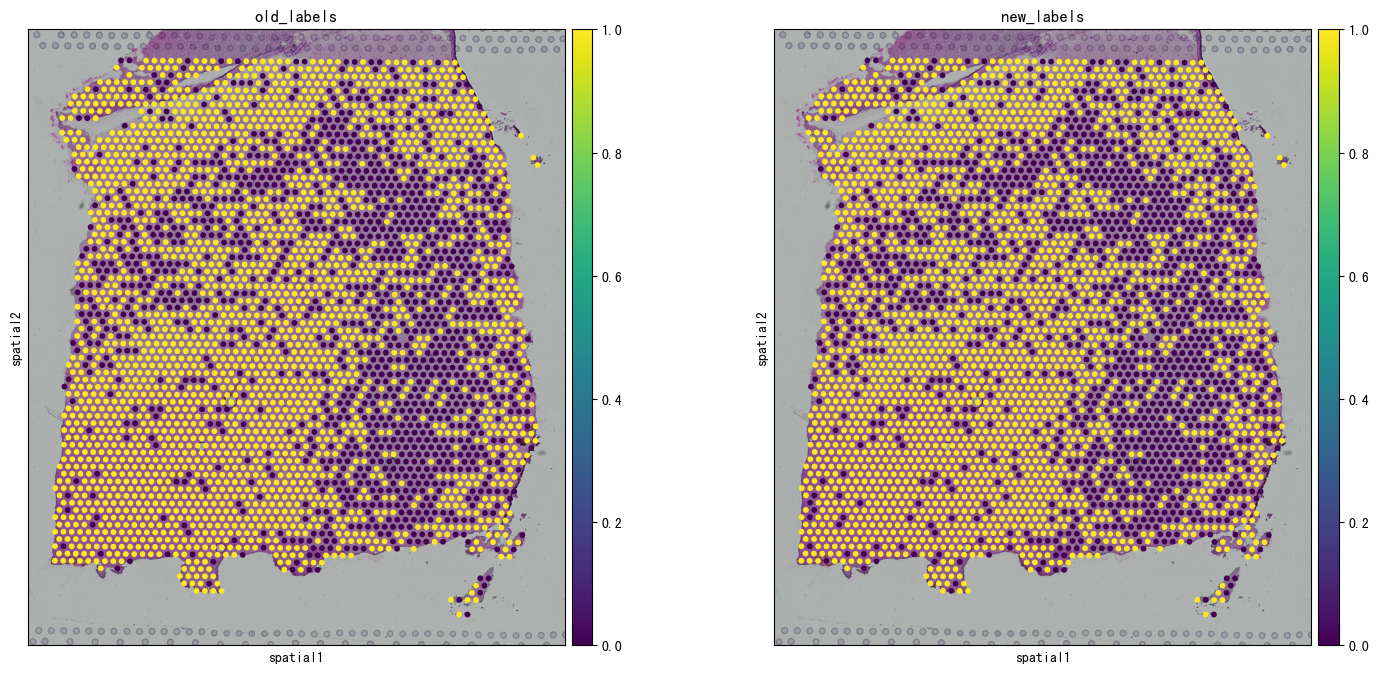

In [14]:
adata.obs['old_labels'] = gmm_labels
adata.obs['new_labels'] = labels_list
sc.pl.spatial(adata, color=['old_labels','new_labels'],)